<a href="https://colab.research.google.com/github/qfaizan401/CNN/blob/master/Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip '/content/drive/My Drive/Colab Notebooks/CNN/Intel Image Classification/intel-image-classification.zip'

Archive:  /content/drive/My Drive/Colab Notebooks/CNN/Intel Image Classification/intel-image-classification.zip
  inflating: seg_train.zip           
  inflating: seg_test.zip            
  inflating: seg_pred.zip            


In [0]:
!unzip '/content/seg_train.zip'

In [0]:
!unzip '/content/seg_test.zip'

In [0]:
train_dir='/content/seg_train'
validation_dir='/content/seg_test'

In [0]:
import os

train_buildings_dir=os.path.join(train_dir,'buildings')
train_forest_dir=os.path.join(train_dir,'forest')
train_glacier_dir=os.path.join(train_dir,'glacier')
train_mountain_dir=os.path.join(train_dir,'mountain')
train_sea_dir=os.path.join(train_dir,'sea')
train_street_dir=os.path.join(train_dir,'street')

validation_buildings_dir=os.path.join(validation_dir,'buildings')
validation_forest_dir=os.path.join(validation_dir,'forest')
validation_glacier_dir=os.path.join(validation_dir,'glacier')
validation_mountain_dir=os.path.join(validation_dir,'mountain')
validation_sea_dir=os.path.join(validation_dir,'sea')
validation_street_dir=os.path.join(validation_dir,'street')

In [0]:
print("   Training Data")
print("Training Images of Buildings: ",len(os.listdir(train_buildings_dir)))
print("Training Images of Forest: ",len(os.listdir(train_forest_dir)))
print("Training Images of Glacier: ",len(os.listdir(train_glacier_dir)))
print("Training Images of Mountains: ",len(os.listdir(train_mountain_dir)))
print("Training Images of Sea: ",len(os.listdir(train_sea_dir)))
print("Training Images of Street: ",len(os.listdir(train_street_dir)))

   Training Data
Training Images of Buildings:  2191
Training Images of Forest:  2271
Training Images of Glacier:  2404
Training Images of Mountains:  2512
Training Images of Sea:  2274
Training Images of Street:  2382


In [0]:
print("   Validation Data")
print("Validation Images of Buildings: ",len(os.listdir(validation_buildings_dir)))
print("Validation Images of Forest: ",len(os.listdir(validation_forest_dir)))
print("Validation Images of Glacier: ",len(os.listdir(validation_glacier_dir)))
print("Validation Images of Mountains: ",len(os.listdir(validation_mountain_dir)))
print("Validation Images of Sea: ",len(os.listdir(validation_sea_dir)))
print("Validation Images of Street: ",len(os.listdir(validation_street_dir)))

   Validation Data
Validation Images of Buildings:  437
Validation Images of Forest:  474
Validation Images of Glacier:  553
Validation Images of Mountains:  525
Validation Images of Sea:  510
Validation Images of Street:  501


In [0]:
from keras import models,layers

In [0]:
model=models.Sequential()
model.add(layers.Conv2D(filters=64,
                        kernel_size=(3,3),
                        activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), 
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), 
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), 
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 6)


In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/30
100/100 [==============================] - 14s 140ms/step - loss: 1.3990 - acc: 0.4320 - val_loss: 1.1907 - val_acc: 0.5120
Epoch 2/30
100/100 [==============================] - 7s 68ms/step - loss: 1.1171 - acc: 0.5699 - val_loss: 1.2656 - val_acc: 0.5240
Epoch 3/30
100/100 [==============================] - 7s 65ms/step - loss: 1.0485 - acc: 0.6020 - val_loss: 1.0157 - val_acc: 0.6020
Epoch 4/30
100/100 [==============================] - 7s 65ms/step - loss: 0.9805 - acc: 0.6295 - val_loss: 0.9278 - val_acc: 0.6370
Epoch 5/30
100/100 [==============================] - 7s 65ms/step - loss: 0.9759 - acc: 0.6325 - val_loss: 1.1693 - val_acc: 0.5760
Epoch 6/30
100/100 [==============================] - 6s 65ms/step - loss: 0.9454 - acc: 0.6495 - val_loss: 0.9269 - val_acc: 0.6670
Epoch 7/30
100/100 [==============================] - 7s 65ms/step - loss: 0.8978 - acc: 0.6600 - val_los

In [0]:
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_csv_file = 'history_1_IntelClassification.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [0]:
model.save('Intel_Classification_1.h5')

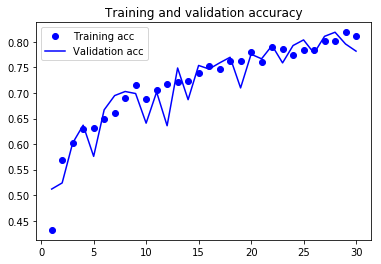

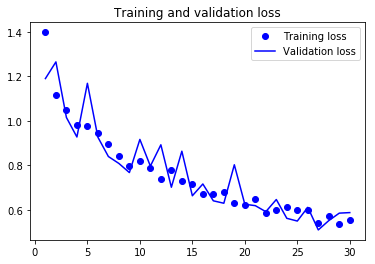

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [0]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

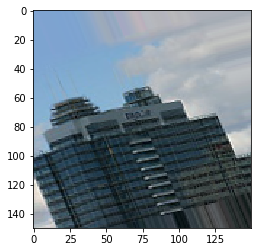

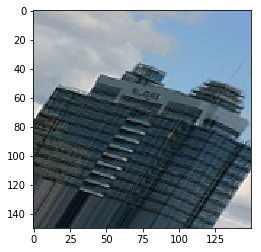

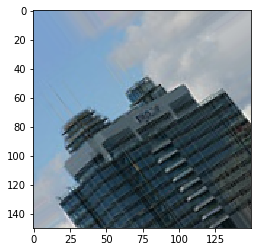

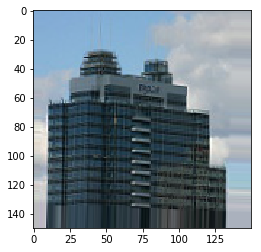

In [0]:
from keras.preprocessing import image

fnames = [os.path.join(train_buildings_dir, fname) for fname in os.listdir(train_buildings_dir)]
img_path = fnames[1]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [0]:
model=models.Sequential()
model.add(layers.Conv2D(filters=64,
                        kernel_size=(3,3),
                        activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), 
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), 
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), 
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 26s 258ms/step - loss: 1.5089 - acc: 0.3703 - val_loss: 1.2404 - val_acc: 0.4994
Epoch 2/100
100/100 [==============================] - 24s 236ms/step - loss: 1.2849 - acc: 0.4931 - val_loss: 1.3635 - val_acc: 0.4849
Epoch 3/100
100/100 [==============================] - 24s 237ms/step - loss: 1.2500 - acc: 0.4978 - val_loss: 1.1545 - val_acc: 0.5356
Epoch 4/100
100/100 [==============================] - 23s 234ms/step - loss: 1.1661 - acc: 0.5344 - val_loss: 1.2080 - val_acc: 0.5314
Epoch 5/100
100/100 [==============================] - 24s 239ms/step - loss: 1.1217 - acc: 0.5665 - val_loss: 1.0123 - val_acc: 0.6238
Epoch 6/100
100/100 [==============================] - 23s 234ms/step - loss: 1.1114 - acc: 0.5563 - val_loss: 1.0899 - val_acc: 0.6137
Epoch 7/100
100/100 [==============================] - 24s 237ms/step - loss: 1.0739 - acc: 0.5848 - val_loss: 1.0029 - val_acc: 0.6331
Epoch 8/100
100/100 [===========================

In [0]:
hist_df = pd.DataFrame(history.history)
hist_csv_file = 'history_Intel_final.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [0]:
model.save('Intel_Classification_final.h5')

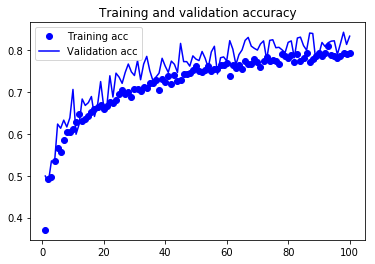

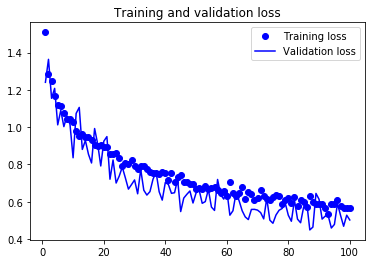

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()